In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
import numpy as np


model_path = './test/my_model.h5'
model = keras.models.load_model(model_path)

ran = np.random.randint(low=0, high=394, size = 50)
correct_ying = 0
for i in ran:
    img = image.load_img('./test/dataset_LUSC_correct_test/ying/ying_'+ str(i) + '.png', target_size=(80, 80))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predict = model.predict(x)
    if round(predict[0,0])==0:
        result = 'ying'
        correct_ying += 1
    else:
        result = 'yang'
    print('correct: ying\tpredict: ', result)

ran = np.random.randint(low=0, high=1200, size = 50)
correct_yang = 0
for i in ran:
    img = image.load_img('./test/dataset_LUSC_correct_test/yang/yang_'+ str(i) + '.png', target_size=(80, 80))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predict = model.predict(x)
    if round(predict[0,0])==0:
        result = 'ying'        
    else:
        result = 'yang'
        correct_yang += 1
    print('correct: yang\tpredict: ', result)

print('ying correct percent: ', correct_ying/50)
print('yang correct percent: ', correct_yang/50)


correct: ying	predict:  yang
correct: ying	predict:  ying
correct: ying	predict:  ying
correct: ying	predict:  yang
correct: ying	predict:  ying
correct: ying	predict:  ying
correct: ying	predict:  yang
correct: ying	predict:  yang
correct: ying	predict:  ying
correct: ying	predict:  yang
correct: ying	predict:  yang
correct: ying	predict:  yang
correct: ying	predict:  yang
correct: ying	predict:  ying
correct: ying	predict:  yang
correct: ying	predict:  ying
correct: ying	predict:  yang
correct: ying	predict:  ying
correct: ying	predict:  ying
correct: ying	predict:  ying
correct: ying	predict:  ying
correct: ying	predict:  yang
correct: ying	predict:  yang
correct: ying	predict:  yang
correct: ying	predict:  ying
correct: ying	predict:  ying
correct: ying	predict:  ying
correct: ying	predict:  yang
correct: ying	predict:  ying
correct: ying	predict:  yang
correct: ying	predict:  yang
correct: ying	predict:  ying
correct: ying	predict:  ying
correct: ying	predict:  yang
correct: ying	

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
import numpy as np
import glob


model_path = './test/my_model.h5'
model = keras.models.load_model(model_path)

# val_image_path = glob.glob('./test/dataset_LUSC_correct_test/*/*.png')
# val_image_label = [int(path.split('\\')[1] == 'yang') for path in val_image_path]
val_image_path = glob.glob('./test/tiny-imagenet-200/val/*/*.JPEG')

def load_preprocess_val_image(path,label):
    image = tf.io.read_file(path)
    image = tf.image.decode_png(image, channels = 3)
    # image = tf.image.resize(image, [256, 256])
    image = tf.cast(image, tf.float32)
    image = image / 255
    label = tf.reshape(label, [1])
    return image, label

BATCH_SIZE = 16
AUTOTUNE = tf.data.experimental.AUTOTUNE
val_image_ds = tf.data.Dataset.from_tensor_slices((val_image_path, val_image_label))
val_image_ds = val_image_ds.map(load_preprocess_val_image, num_parallel_calls = AUTOTUNE )
val_image_ds = val_image_ds.batch(BATCH_SIZE)

val_count = len(val_image_path)

model.compile(metrics=[keras.metrics.Precision(), keras.metrics.Recall()])
history = model.evaluate(
    val_image_ds
)
print(history)

101/101 [==============================] - 5s 36ms/step - loss: 0.0000e+00 - precision: 0.9138 - recall: 0.9318
[0.0, 0.9137791991233826, 0.9317995309829712]


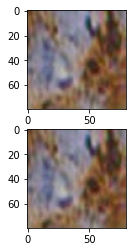

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 80, 80, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'") at layer "block1_conv1". The following previous layers were accessed without issue: []

In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt


model_path = './test/my_model.h5'
model = keras.models.load_model(model_path)
img = image.load_img('./test/dataset_LUSC_correct_test/yang/yang_0.png', target_size=(80, 80))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.
# x = preprocess_input(x)
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].imshow(img)
axes[1].imshow(x[0])
plt.show()

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = keras.models.Model(inputs=model.inputs, outputs=layer_outputs)
activations = activation_model.predict(x)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
# predict = model.predict(x)
# print(round(predict[0,0])==0)
# print(predict.shape)
